In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
%matplotlib inline

## 1. Introduction

Working on the Titanic Data Set, which is a sample of the passangers on aboard the ship 'Titanic' having various paramters like suvival, age, class etc...

We would analyse this data to see if any of the factors like class, sex, age led to the survival of the passanger, i.e.. on factors the survival rate depended.

I will pose my question once I have seen some data and can infer few things abount the data.

In [178]:
#Loading the csv data into the dataFrame.
titanic_df = pd.read_csv('titanic-data.csv')

##### Checking out how the data is structured

In [179]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Questions for analysing the data

1. Which passangers were most likely to survive
2. How much role did social class play in the survival rate.
3. Which age group and Gender had better chance of survival.
4. Did passangers with high fare had higher survival rate ?

## 3. Data Wrangling

As per Kaggle Notes on the Titanic Data. For the survival column, 0 --> No (Did Not Survive) while 1 --> Yes( Did Survive)

Analysing how many attributes are there (Total Count) and how many of them are captured

In [180]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [181]:
len(titanic_df.index)

891

## 3.1 Missing Data

Age Data for some passangers is missing.
Would need to assign these missing values some value based on the Sex and Class of the passenger

Calculating grouped mean based on Gender and Age

In [182]:

titanic_df.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [183]:
means = titanic_df.groupby(['Sex','Pclass'])['Age'].mean()

In [184]:
means['female'][1]

34.611764705882351

In [185]:
titanic_df.iloc[1]['Sex']

'female'

In [186]:
titanic_df.iloc[1]['Pclass']

1

##### Now replacing the no values for Age with above calculated Mean

In [187]:
#replacing null age with mean age based on Sex and Pclass
def mean_age(passanger):
    if pd.isnull(passanger['Age']):
        passanger['Age'] = means[passanger['Sex'],passanger['Pclass']]
    return passanger['Age']

In [188]:
titanic_test_df = titanic_df[titanic_df['Age'].isnull()].copy()

Data where Age is null Before Replacement

In [189]:
titanic_test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [190]:
titanic_test_df['Age'] = titanic_df.apply(mean_age,axis=1)

In [191]:
titanic_test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.740707,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,21.750000,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,26.507589,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.750000,0,0,330959,7.8792,NaN,Q


In [192]:
titanic_df['Age'] =titanic_df.apply(mean_age, axis=1)

Data where Age is null after Replacement

In [193]:
titanic_df[titanic_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### We can now see that there are no empty data for the Age
Although there are still some missing data for Cabin, but we might not need that in our analysis based on the questions posed above. However, for furhter analysis we might need to fill those values as well

### 3.2 Converting the Survived and Pclass Values for Meaningful representation

Survived is represented as 0 -> Did Not Survive and 1 -> Did Survive
Creating a new Attribute 'Surive' for better representation
Similarly PClass is represneted as 1,2,3
Creating 'Class' for better representation

In [194]:
titanic_df['Survive']=titanic_df['Survived'].replace({0:'No', 1:'Yes'})
titanic_df['Class']=titanic_df['Pclass'].replace({1:'First', 2:'Second', 3:'Third'})

## 4. Analysing the Data

### 4.1 Analysing Ages vs Survivors

Checking to see in different ages how many people survived, what was the survival rate

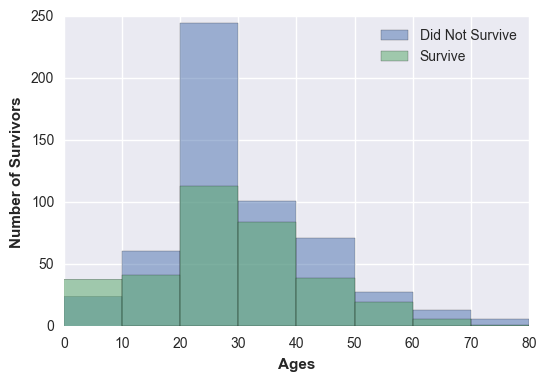

In [195]:
#Analysing number of survivors across different ages

did_not_survive = titanic_df[titanic_df['Survived'] == 0]
did_survive = titanic_df[titanic_df['Survived'] == 1]
age_range = range(0,90,10)
plt.hist(did_not_survive['Age'],bins = age_range,alpha = 0.5,label = 'Did Not Survive')
plt.hist(did_survive['Age'],bins = age_range,alpha = 0.5,label = 'Survive')
plt.xlabel('Ages', fontweight='bold' )
plt.ylabel('Number of Survivors', fontweight='bold')
plt.legend(loc='upper right')
plt.show()

##### Analysing Surivial Rate by Age Group

In the above visualisation we can see that lower age pasangers ahd maximum survival rate.

Building on it, we can see that we divide the passangers in age groups ->

Children : 0-18 Years 

Adults   : 18-40 Years

Seniors  : 40+ Years

We should be able to see a trend in the survival rate for age groups

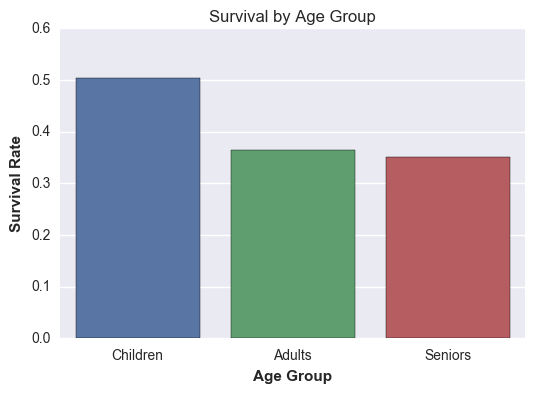

In [196]:
titanic_df['age_group'] = pd.cut(titanic_df['Age'],bins = [0,18,40,90], labels=['Children','Adults','Seniors'])
sns.barplot(x="age_group", y="Survived", data=titanic_df,ci=None)
plt.xlabel('Age Group', fontweight = 'bold')
plt.ylabel('Survival Rate', fontweight = 'bold')
plt.title('Survival by Age Group')


#### As the Age Increased the Survival Rate Decreased

### 4.2 Analysing Passanger Gender vs Survival Rate

Checking if there was any difference between Female and Male Survival Rate

In [197]:
survival_sex = titanic_df.groupby(['Survive','Sex']).size().unstack('Survive')
survival_sex

Survive,No,Yes
Sex,,
female,81,233
male,468,109


In [198]:
survival_rate = survival_sex.divide(survival_sex.sum(axis=1),axis=0)*100
survival_rate

Survive,No,Yes
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


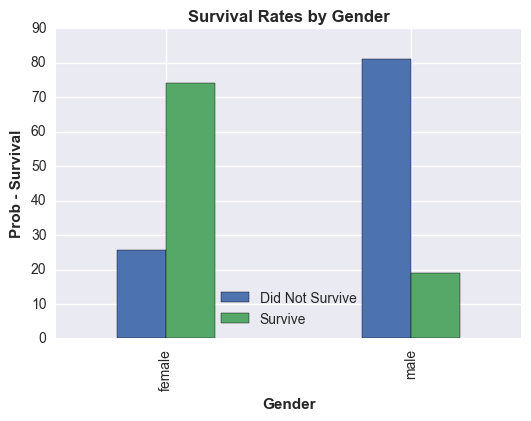

In [199]:
survival_rate.plot(kind = 'bar', width = 0.4)
#plt.legend(loc='lower center', shadow = True)
#l=plt.legend()
#l.get_texts()[0].set_text('Did Not Survive')
#l.get_texts()[1].set_text('Survive')
plt.legend(loc='lower center', labels=['Did Not Survive','Survive'])
plt.xlabel('Gender', fontweight = 'bold')
plt.ylabel('Prob - Survival', fontweight = 'bold')
plt.title('Survival Rates by Gender',fontweight = 'bold')

##### Females had much higher survival chances as compared to Male

### 4.3 Analysing Pclass vs Survival

Exploring how much role did the Passanger class play in the survival rate

In [200]:
#how many passangers survived per pclass
survival_by_pclass = titanic_df.groupby(['Survive','Class']).agg({'Survived':'count'})

In [201]:
survival_by_pclass_percent = survival_by_pclass.groupby(level=1).apply(lambda x: 100 * x/float(x.sum()))

In [202]:
survival_by_pclass_percent

Survived
Survive Class            
No      First   37.037037
        Second  52.717391
        Third   75.763747
Yes     First   62.962963
        Second  47.282609
        Third   24.236253

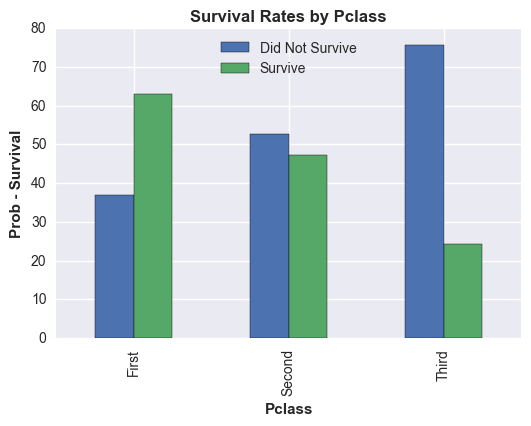

In [203]:
survival_by_pclass_percent.unstack('Survive').plot(kind='bar',stacked=False)
plt.legend(loc='upper center', labels=['Did Not Survive','Survive'])
plt.xlabel('Pclass', fontweight = 'bold')
plt.ylabel('Prob - Survival', fontweight = 'bold')
plt.title('Survival Rates by Pclass',fontweight = 'bold')

##### We can clearly see that in the higher class (First) the Probability of Survival was much higher compared to lower classes

#### Checking how much variance was there in 'Male' and 'Female' Survival by different Classes

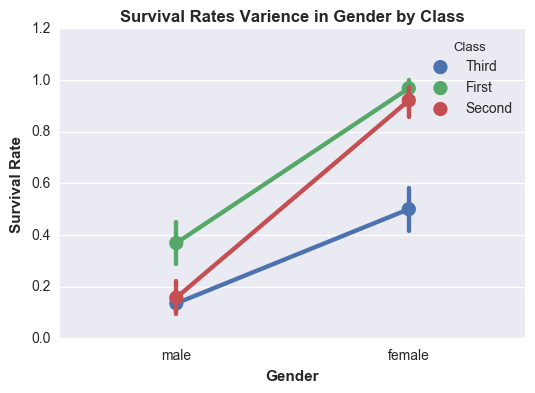

In [204]:
sns.pointplot(x="Sex", y="Survived", hue="Class", data=titanic_df)
plt.xlabel('Gender', fontweight = 'bold')
plt.ylabel('Survival Rate', fontweight = 'bold')
plt.title('Survival Rates Varience in Gender by Class',fontweight = 'bold')

#### In Third class there isn't much difference in the survival rate of Males and Femals, while there is a huge difference for First and Second Class

### 4.4 Analysing Fare vs Survival

Exploring if there was any relation between the ticket fare of the passanger and the survival chances

In [205]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Checking how many passangers were there by Fare

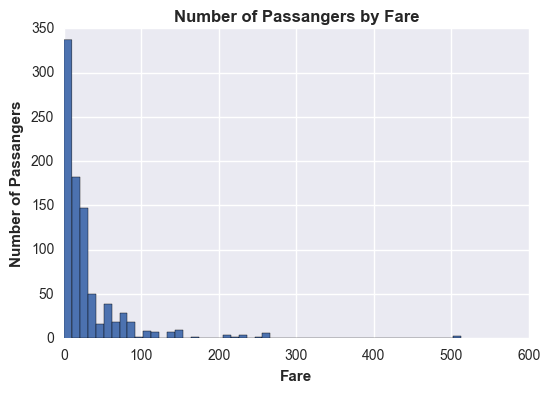

In [206]:
plt.hist(titanic_df['Fare'],bins = 50,label = 'Fares')
plt.xlabel('Fare', fontweight = 'bold')
plt.ylabel('Number of Passangers', fontweight = 'bold')
plt.title('Number of Passangers by Fare',fontweight = 'bold')

In [207]:
ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600]

In [208]:
titanic_fare_range_df = titanic_df.groupby(pd.cut(titanic_df.Fare, ranges))

In [209]:
survived_data_df = titanic_df[titanic_df['Survived'] == 1]

In [210]:
titanic_fare_survive_range_df = survived_data_df.groupby(pd.cut(survived_data_df.Fare, ranges))

In [211]:
titanic_fare_survive_range_df.count().Fare

Fare
(0, 50]       232
(50, 100]      70
(100, 150]     19
(150, 200]      6
(200, 250]      7
(250, 300]      4
(300, 350]      0
(350, 400]      0
(400, 450]      0
(450, 500]      0
(500, 550]      3
(550, 600]      0
Name: Fare, dtype: int64

In [212]:
survival_by_fare = np.divide(titanic_fare_survive_range_df.count().Fare, titanic_fare_range_df.count().Fare)

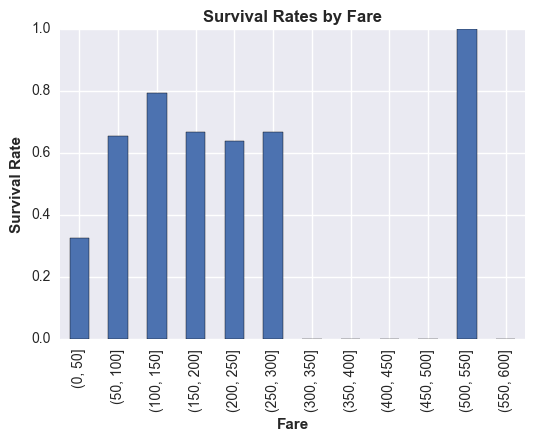

In [213]:
survival_by_fare.plot(kind='bar')
plt.xlabel('Fare', fontweight = 'bold')
plt.ylabel('Survival Rate', fontweight = 'bold')
plt.title('Survival Rates by Fare',fontweight = 'bold')

##### We can see that as the fare increased the survival rate also increased, for really high fare pssangers the survival rate was 100%

## 5. Conclusion

From the above analysis we can see that, children of the age group 0-10 years had highest survival rate.
In face apart from the 0-10 age group, all other groups had better chances of dying than surviving.

For Sex, it is clear that Females had much higher survival rate than males.

For Class, Only the First class passangers had a higher survival rate as compared to death rate,
for classes second and third, the death rate was higher than survival rate.
Also we saw that the varience between the survival rate for 'Male' and 'Female' was huge in first and Second Class and not much difference for the Third Class

When analysing the Fare we saw that passangers with higher fare had better survival rate as compared to lower fare ones, in fact the passangers with fares < 50 had the worst survival rate.

There few limitations in the dataset, such as missing cabing number. If we had that data we could have checked if cabin number(position) played any factor in the survival rate and if person with pclass as 2 or 3 but having closer cabin had better chances of survival.

As this is only a sample of data, if more data is available we can build on our hypothesis and draw more concrete conclusions.

## 6. References

1. Book - Python for Data Analysis - Wes McKinney
2. Pandas Docs - http://pandas.pydata.org/pandas-docs/stable/visualization.html
3. http://seaborn.pydata.org/tutorial/categorical.html